In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000093751"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000093751
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,STATE STREET CORP
Ticker,STT


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
interest income,51.0,7.530319e+08,2.606926e+08,6.290000e+05,6.485000e+08,7.300000e+08,8.670000e+08,1.427000e+09
net income,52.0,3.906802e+08,5.365426e+08,-3.182000e+09,4.187500e+08,4.935000e+08,5.607500e+08,7.650000e+08
net interest income,52.0,5.571829e+08,1.662162e+08,5.120000e+05,5.365000e+08,5.770000e+08,6.565000e+08,8.430000e+08
provision for loan losses,50.0,4.600080e+06,1.301174e+07,-2.000000e+06,0.000000e+00,1.000000e+06,4.000000e+06,8.400000e+07
total revenue,52.0,2.347952e+09,6.255427e+08,2.484000e+06,2.308500e+09,2.488000e+09,2.630000e+09,3.026000e+09


# Plots

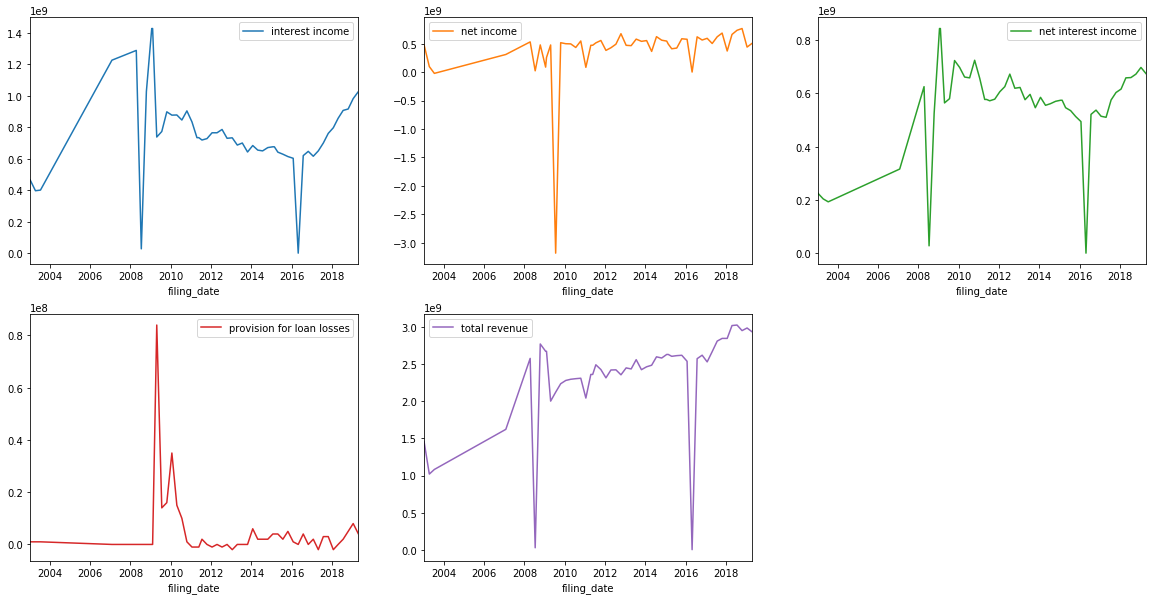

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000093751 book value per share                               None      empty   
           interest income            2003Q3 to 2006Q3: 13 periods    missing   
           interest income             2007Q1 to 2007Q4: 4 periods    missing   
           net income                 2003Q3 to 2006Q3: 13 periods    missing   
           net income                  2007Q1 to 2007Q4: 4 periods    missing   
           net income                                       2008Q4  duplicate   
           net interest income        2003Q3 to 2006Q3: 13 periods    missing   
           net interest income         2007Q1 to 2007Q4: 4 periods    missing   
           provision for loan losses  2003Q1 to 2006Q3: 15 periods    missing   
           provision for loan losses   2007Q1 to 2007Q4: 4 periods    missing   
           total revenue              2003Q3 to 2006Q3: 13 periods    missing   
           total revenue               2007Q1 to 2007Q4: 4 periods    missing   

                                                 message  
cik        item                                           
0000093751 book value per share       No values for item  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue                  Missing period  
           total revenue                  Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()